In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bank[1].csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Axes: xlabel='education', ylabel='count'>

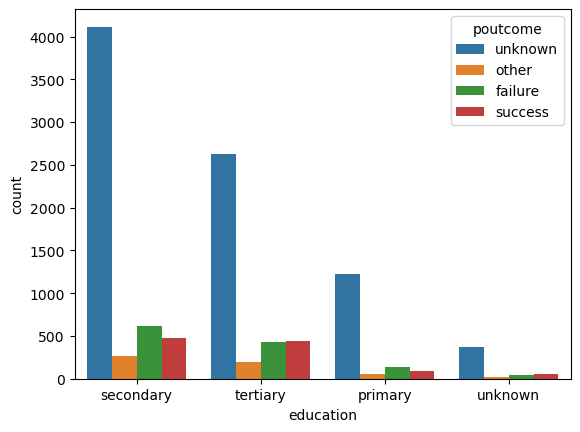

In [6]:
sns.countplot(data=df,x=df['education'],hue=df['poutcome'])

<Axes: xlabel='poutcome', ylabel='count'>

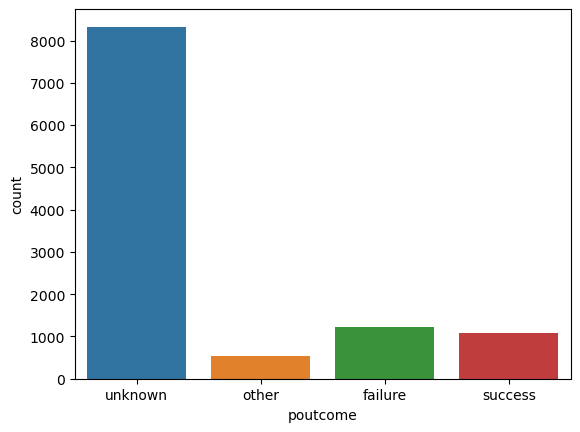

In [7]:
sns.countplot(data=df,x=df['poutcome'],hue=df['poutcome'])

<Axes: xlabel='deposit', ylabel='count'>

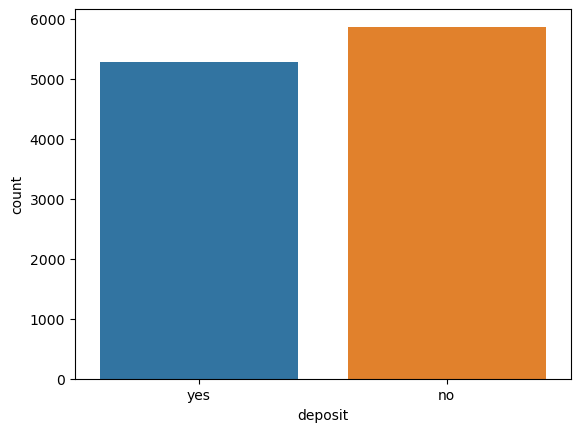

In [8]:
sns.countplot(data=df,x=df['deposit'],hue=df['deposit'])
#almost a balanced dataset, good to go for training and testing

In [9]:
#trying to add a few feature,let us use polynomial converter first

from sklearn.preprocessing import PolynomialFeatures

In [10]:
df_use=pd.get_dummies(data=df,drop_first=True,dtype=int)

In [11]:
df_use

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
X=df_use.drop("deposit_yes",axis=1)

In [13]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
y=df_use['deposit_yes']

In [15]:
y.value_counts()

deposit_yes
0    5873
1    5289
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [28]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
model=LogisticRegression()
scaled_X_train

array([[ 1.80880339, -0.0196111 , -0.90568275, ..., -0.22300135,
        -0.3241516 ,  0.58748113],
       [-0.8681072 , -0.29506106, -1.26216159, ..., -0.22300135,
        -0.3241516 , -1.70218234],
       [-1.62098831, -0.34011831,  0.04492749, ..., -0.22300135,
         3.08497632, -1.70218234],
       ...,
       [-0.28253301,  0.1588156 ,  0.04492749, ..., -0.22300135,
        -0.3241516 , -1.70218234],
       [-0.78445375,  2.1960039 ,  0.28258005, ..., -0.22300135,
        -0.3241516 ,  0.58748113],
       [ 0.38669463,  0.50275258,  0.52023261, ..., -0.22300135,
        -0.3241516 ,  0.58748113]])

In [20]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [21]:
pred=model.predict(scaled_X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1181
           1       0.84      0.80      0.82      1052

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [24]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_list={'penalty':['l1', 'l2', 'elasticnet'],'C':[0.01,0.1,0.5],'max_iter':[2000],'solver':['saga'],'l1_ratio':[0.0,0.2,0.5,0.8]}

In [30]:
grid_model=GridSearchCV(model,param_grid=param_list)

In [31]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Shreyansh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Shreyansh\a

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5],
                         'l1_ratio': [0.0, 0.2, 0.5, 0.8], 'max_iter': [2000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']})

In [32]:
grid_model.best_params_

{'C': 0.1,
 'l1_ratio': 0.0,
 'max_iter': 2000,
 'penalty': 'l2',
 'solver': 'saga'}

In [33]:
final_model=grid_model.best_estimator_

In [34]:
pred_final=final_model.predict(scaled_X_test)

In [35]:
print(classification_report(y_test,pred_final))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1181
           1       0.84      0.80      0.82      1052

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [36]:
from sklearn.svm import SVC

In [38]:
model=SVC()
model.fit(scaled_X_train,y_train)
pred_svm=model.predict(scaled_X_test)
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1181
           1       0.83      0.87      0.85      1052

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



In [44]:
param_grid={'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'degree':[2,3]}

In [45]:
grid_svm=GridSearchCV(model,param_grid=param_grid,cv=5,verbose=False)

In [46]:
grid_svm.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=False)

In [47]:
grid_svm.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [48]:
model=grid_svm.best_estimator_

In [49]:
pred=model.predict(scaled_X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1181
           1       0.83      0.87      0.85      1052

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233

